In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
#Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sci
import datetime
from IPython.core.display import HTML
%matplotlib inline


In [3]:
#Import dataset
df = pd.read_csv ('rgr_data_test.csv',sep=',')
display(df.head())

#Rename Columns
column_name_map = { 'LOCATION' : 'City',
                    'RIDER_ID' : 'Rider_ID',
                    'APPLICATION_DATE' : 'Application Date',
                    'APPLICATION_APPROVED_DATE' : 'Application Approved Date',
                    'FIRST_WORK_DATE' : 'First Work Date',
                    'ACQUISITION_CHANNEL' : 'Acquisition Channel',
                    'VEHICLE_TYPE' : 'Vehicle',
                    'DAYS_SINCE_ACQUISITION' : 'Days Since Acquisition',
                    'HOURS_WORKED_CUMULATIVE' : 'Hours Worked Cumulative',
                    'ORDERS_DELIVERED_CUMULATIVE' : 'Orders Delivered Cumulative',
                    'THROUGHPUT_CUMULATIVE' : 'Throughput Cumulative',
                    'REFERRALS_CUMULATIVE' : 'Referrals Cumulative',
                    'SUCCESSFUL_REFERRALS_CUMULATIVE' : 'Successful Referrals Cumulative'} 
df = df.rename(columns=column_name_map)

display(df.head())


,RIDER_ID,LOCATION,APPLICATION_DATE,APPLICATION_APPROVED_DATE,FIRST_WORK_DATE,ACQUISITION_CHANNEL,VEHICLE_TYPE,DAYS_SINCE_ACQUISITION,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED_CUMULATIVE,THROUGHPUT_CUMULATIVE,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS_CUMULATIVE
0,73350,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-09,Organic,Bicycle,7,11.9,12,1.01,NaN,NaN
1,73350,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-09,Organic,Bicycle,14,13.1,13,0.99,NaN,NaN
2,73350,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-09,Organic,Bicycle,28,19.1,20,1.04,NaN,NaN
3,73350,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-09,Organic,Bicycle,56,33.4,39,1.17,NaN,NaN
4,73350,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-09,Organic,Bicycle,84,33.4,39,1.17,NaN,NaN


,Rider_ID,City,Application Date,Application Approved Date,First Work Date,Acquisition Channel,Vehicle,Days Since Acquisition,Hours Worked Cumulative,Orders Delivered Cumulative,Throughput Cumulative,Referrals Cumulative,Successful Referrals Cumulative
0,73350,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-09,Organic,Bicycle,7,11.9,12,1.01,NaN,NaN
1,73350,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-09,Organic,Bicycle,14,13.1,13,0.99,NaN,NaN
2,73350,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-09,Organic,Bicycle,28,19.1,20,1.04,NaN,NaN
3,73350,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-09,Organic,Bicycle,56,33.4,39,1.17,NaN,NaN
4,73350,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-09,Organic,Bicycle,84,33.4,39,1.17,NaN,NaN


In [4]:
#There is a line for each rider at the 7/14/... mark. We can use this to compare riders over various different time periods
#Limit to 28 days for now, one month seems a reasonable length of time
display(df.loc[df['Rider_ID']==40206,:])


,Rider_ID,City,Application Date,Application Approved Date,First Work Date,Acquisition Channel,Vehicle,Days Since Acquisition,Hours Worked Cumulative,Orders Delivered Cumulative,Throughput Cumulative,Referrals Cumulative,Successful Referrals Cumulative
588,40206,Roo de Janeiro,2016-06-15 00:00:00.000000000,2016-07-09 00:00:00.000000000,2017-01-16,Organic,Bicycle,7,2.0,5,2.47,NaN,NaN
589,40206,Roo de Janeiro,2016-06-15 00:00:00.000000000,2016-07-09 00:00:00.000000000,2017-01-16,Organic,Bicycle,14,2.0,5,2.47,NaN,NaN
590,40206,Roo de Janeiro,2016-06-15 00:00:00.000000000,2016-07-09 00:00:00.000000000,2017-01-16,Organic,Bicycle,28,2.0,5,2.47,NaN,NaN
591,40206,Roo de Janeiro,2016-06-15 00:00:00.000000000,2016-07-09 00:00:00.000000000,2017-01-16,Organic,Bicycle,56,2.0,5,2.47,NaN,NaN
592,40206,Roo de Janeiro,2016-06-15 00:00:00.000000000,2016-07-09 00:00:00.000000000,2017-01-16,Organic,Bicycle,84,2.0,5,2.47,NaN,NaN
593,40206,Roo de Janeiro,2016-06-15 00:00:00.000000000,2016-07-09 00:00:00.000000000,2017-01-16,Organic,Bicycle,168,2.0,5,2.47,NaN,NaN


In [5]:
#Create grouped aggregates for the data frame to see volumes in various buckets

grouped_df = df.copy()
grouped_df = df.loc[df['Days Since Acquisition']==28,['City','Acquisition Channel','Vehicle','Rider_ID','Hours Worked Cumulative','Orders Delivered Cumulative','Referrals Cumulative','Successful Referrals Cumulative']].groupby(['City','Acquisition Channel','Vehicle'])

grouped_df = grouped_df.agg({
                'Rider_ID' : 'nunique', 
                'Hours Worked Cumulative' : ['sum', 'max','mean'],
                'Orders Delivered Cumulative' : ['sum', 'max','mean'],
                'Referrals Cumulative' : ['sum', 'max','mean'],
                'Successful Referrals Cumulative' : ['sum', 'max','mean']
})

display(grouped_df)

#Roo Town is much lower volume than the other 2 locations and has negligible referral volumes. This location could be excluded from the analysis
#Roo York is the only location with scooter referrals. So for scooter referrals comparison only need to look at other Roo York channels
#2 measures of success from these metrics. 
#   Measure of activity done: orders/hours worked, Average rider throughput
#   Measure of referrals done: referrals, success rate of referrals 
#   These 2 measures can also be compared at different time frames, 7/14/28 days after acquisition to look at how riders from different channels perform over time

#Max and mean are displayed here to take a very rough look for outliers etc. More outlier detection/removal/bucketing further on if time allows

Rider_ID  \
                                                         nunique   
City           Acquisition Channel Vehicle                         
Roo Town       Digital             Bicycle                    42   
                                   Motor Vehicle               4   
                                   Scooter / Motorcycle        1   
               Job Platforms       Bicycle                    14   
                                   Motor Vehicle               5   
               Offline             Bicycle                    15   
                                   Motor Vehicle               3   
               Organic             Bicycle                   180   
                                   Motor Vehicle              30   
                                   Scooter / Motorcycle        1   
               Referral            Bicycle                    12   
                                   Motor Vehicle               2   
               Unknown             Bicycle                    11   
                                   Motor Vehicle               4   
Roo York       Digital             Bicycle                   539   
                                   Scooter / Motorcycle      124   
               Job Platforms       Bicycle                    35   
                                   Scooter / Motorcycle       10   
               Offline             Bicycle                   158   
                                   Scooter / Motorcycle      106   
               Organic             Bicycle                   939   
                                   Electric Bicycle            3   
                                   Pedestrian / Walker         3   
                                   Scooter / Motorcycle      299   
               Referral            Bicycle                   614   
                                   Pedestrian / Walker         1   
                                   Scooter / Motorcycle      500   
               Unknown             Bicycle                    23   
                                   Pedestrian / Walker         1   
                                   Scooter / Motorcycle       14   
Roo de Janeiro Digital             Bicycle                    41   
               Job Platforms       Bicycle                     3   
               Offline             Bicycle                    14   
               Organic             Bicycle                  1253   
                                   Pedestrian / Walker         1   
                                   Scooter / Motorcycle       26   
               Referral            Bicycle                    87   
               Unknown             Bicycle                    50   
                                   Pedestrian / Walker         3   
                                   Scooter / Motorcycle        2   

                                                        Hours Worked Cumulative  \
                                                                            sum   
City           Acquisition Channel Vehicle                                        
Roo Town       Digital             Bicycle                               3026.6   
                                   Motor Vehicle                          304.2   
                                   Scooter / Motorcycle                     4.2   
               Job Platforms       Bicycle                                807.3   
                                   Motor Vehicle                          608.1   
               Offline             Bicycle                                713.1   
                                   Motor Vehicle                          259.9   
               Organic             Bicycle                              11078.9   
                                   Motor Vehicle                         3214.3   
                                   Scooter / Motorcycle                     1.1   
               Referral            Bicycle          

In [6]:
df.head()

,Rider_ID,City,Application Date,Application Approved Date,First Work Date,Acquisition Channel,Vehicle,Days Since Acquisition,Hours Worked Cumulative,Orders Delivered Cumulative,Throughput Cumulative,Referrals Cumulative,Successful Referrals Cumulative
0,73350,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-09,Organic,Bicycle,7,11.9,12,1.01,NaN,NaN
1,73350,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-09,Organic,Bicycle,14,13.1,13,0.99,NaN,NaN
2,73350,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-09,Organic,Bicycle,28,19.1,20,1.04,NaN,NaN
3,73350,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-09,Organic,Bicycle,56,33.4,39,1.17,NaN,NaN
4,73350,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-09,Organic,Bicycle,84,33.4,39,1.17,NaN,NaN


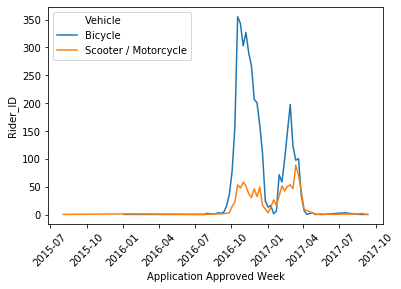

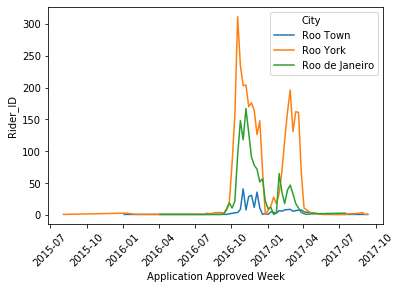

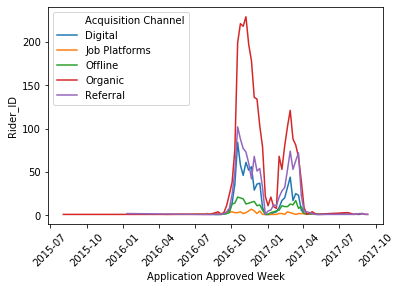

In [7]:
#Look at application volumes over time
#Using the application approved date instead of app date. Thereby only looking at approved applications
#   This may skew data if we were looking at something dependent on application date, ie: marketing campaigns launched on given dates

#Also not considering the first_work_date, different channels/vehicles may have longer start up times (days between app and start of work)
#This could impact the comparisons between channels/vehicles when using shorter 'Days Since Acquisition' values

#Using 28 day row only, not relevant when looking at volume of applications

#Look at volumes by location/vehicle/channel over time.
#Only look at bicycle and scooter, since these are the bulk of referral applications
#Remove applications without application approval dates

time_df = df.loc[~(df['Application Approved Date'].isna()) &
                 (df['Days Since Acquisition']==28),:].copy()

time_df['Application Approved Date'] = pd.to_datetime(time_df['Application Approved Date'])
time_df['Application Approved Week'] = time_df['Application Approved Date'] - time_df['Application Approved Date'].dt.weekday.astype('timedelta64[D]')

time_df = time_df.loc[time_df['Vehicle'].isin(['Bicycle','Scooter / Motorcycle']),['Application Approved Week','Application Approved Date','City','Acquisition Channel','Vehicle','Rider_ID','Hours Worked Cumulative','Orders Delivered Cumulative','Referrals Cumulative','Successful Referrals Cumulative']]

for group_factor in ['Vehicle','City','Acquisition Channel']:

    line_df = time_df.groupby(['Application Approved Week',group_factor])
    line_df = line_df.agg({
                    'Rider_ID' : 'nunique', 
                    'Hours Worked Cumulative' : 'sum',
                    'Orders Delivered Cumulative' : 'sum',
                    'Referrals Cumulative' : 'sum',
                    'Successful Referrals Cumulative' : 'sum'})
    line_df = line_df.reset_index()
    line_df = line_df.sort_values(by = [group_factor,'Application Approved Week'])

    p = sns.lineplot(data=line_df, x="Application Approved Week", y="Rider_ID", hue=group_factor)
    plt.xticks(rotation=45)

    plt.show()

    
#There are 2 large application surges. We could look at these two cohorts separately, however not the focus of this investigation

#We could consider limiting to the reduced date range which captures these two 'bumps'
#    Applications outside this range may not be representative/similar to other riders who are in the main cohorts
#Roo De Janeiro has fewer applications in the second wave than other cities. We may want to consider this when considering RDJ
#The second bump has far fewer bicycle applications. Maybe related to the lower number of riders in RDJ
#The applications appear to have a similar mix of applications from the various application channels

In [8]:
#Lets find a good cutoff for the application week/date.

time_df = df.loc[~(df['Application Approved Date'].isna()) &
                 (df['Days Since Acquisition']==28),['Application Approved Date','Rider_ID']].copy()
time_df = time_df.loc[(df['Application Approved Date']>'2016-07-01'),:]

time_df['Application Approved Date'] = pd.to_datetime(time_df['Application Approved Date'])
time_df['Application Approved Week'] = time_df['Application Approved Date'] - time_df['Application Approved Date'].dt.weekday.astype('timedelta64[D]')

time_df = time_df.groupby('Application Approved Week').agg({'Rider_ID':'nunique'})

time_df

#Sensible time frame appears to be: 2016-09-12 to 2017-04-03

,Rider_ID
Application Approved Week,
2016-07-04,1
2016-07-25,2
2016-08-01,3
2016-08-08,2
2016-08-22,4
2016-08-29,6
2016-09-05,5
2016-09-12,6
2016-09-19,19


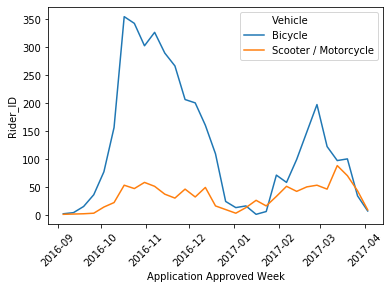

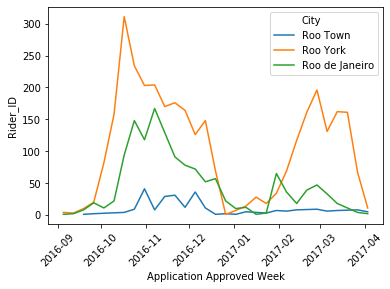

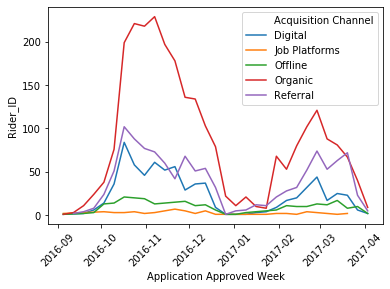

In [9]:
#Repeat the code above but with new date limiter. If repeated this plotting section could/should be functionised to avoid copy/paste, but no time for that here

time_df = df.loc[~(df['Application Approved Date'].isna()) &
                 (df['Days Since Acquisition']==28) &
                 (df['Application Approved Date']>'2016-09-05') &
                 (df['Application Approved Date']<'2017-04-10'),:].copy()

time_df['Application Approved Date'] = pd.to_datetime(time_df['Application Approved Date'])
time_df['Application Approved Week'] = time_df['Application Approved Date'] - time_df['Application Approved Date'].dt.weekday.astype('timedelta64[D]')

time_df = time_df.loc[time_df['Vehicle'].isin(['Bicycle','Scooter / Motorcycle']),['Application Approved Week','Application Approved Date','City','Acquisition Channel','Vehicle','Rider_ID','Hours Worked Cumulative','Orders Delivered Cumulative','Referrals Cumulative','Successful Referrals Cumulative']]

for group_factor in ['Vehicle','City','Acquisition Channel']:

    line_df = time_df.groupby(['Application Approved Week',group_factor])
    line_df = line_df.agg({
                    'Rider_ID' : 'nunique', 
                    'Hours Worked Cumulative' : 'sum',
                    'Orders Delivered Cumulative' : 'sum',
                    'Referrals Cumulative' : 'sum',
                    'Successful Referrals Cumulative' : 'sum'})
    line_df = line_df.reset_index()
    line_df = line_df.sort_values(by = [group_factor,'Application Approved Week'])

    p = sns.lineplot(data=line_df, x="Application Approved Week", y="Rider_ID", hue=group_factor)
    plt.xticks(rotation=45)

    plt.show()

#Graph is much more legible, we have captured the majority of applications

In [10]:
# Create dataframes for our 2 locations, using the limits decided above
# Here we would also insert our outlier removal/treatment

#For RDJ
# Bicycle applications from the timeframe
# Organic, digital and referral channels (other channels have low volume)

rdj_df = df.loc[(df['City']=='Roo de Janeiro') &
                (df['Vehicle']=='Bicycle') &
                (df['Application Approved Date']>'2016-09-05') &
                (df['Application Approved Date']<'2017-04-10'),:].copy()

#For RY
# Bicycle and scooter applications from the tiemframe
# Organic, digital, referral and offline channels

ry_df = df.loc[(df['City']=='Roo York') &
                (df['Vehicle'].isin(['Bicycle','Scooter / Motorcycle'])) &
                (df['Application Approved Date']>'2016-09-05') &
                (df['Application Approved Date']<'2017-04-10'),:].copy()


In [11]:
rdj_df.head()

,Rider_ID,City,Application Date,Application Approved Date,First Work Date,Acquisition Channel,Vehicle,Days Since Acquisition,Hours Worked Cumulative,Orders Delivered Cumulative,Throughput Cumulative,Referrals Cumulative,Successful Referrals Cumulative
0,73350,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-09,Organic,Bicycle,7,11.9,12,1.01,NaN,NaN
1,73350,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-09,Organic,Bicycle,14,13.1,13,0.99,NaN,NaN
2,73350,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-09,Organic,Bicycle,28,19.1,20,1.04,NaN,NaN
3,73350,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-09,Organic,Bicycle,56,33.4,39,1.17,NaN,NaN
4,73350,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-09,Organic,Bicycle,84,33.4,39,1.17,NaN,NaN


In [12]:
#Compare rider metrics between channels for one vehicle, use 28 day mark as default

#Rider metrics
# Total delivered, average delivered
# Throughput?
# Average Sucessful referrals

def compare_rider_channel_table(dataframe, vehicle, acquisition_channels, days_since_acq = 28):
    #Manipulate frame into required state
    table_df = dataframe.copy()
    
    table_df = table_df.loc[(table_df['Acquisition Channel'].isin(acquisition_channels)) &
                            (table_df['Vehicle']==vehicle) &
                            (table_df['Days Since Acquisition']==days_since_acq),
                            ['Acquisition Channel','Vehicle','Orders Delivered Cumulative','Hours Worked Cumulative','Throughput Cumulative','Referrals Cumulative','Successful Referrals Cumulative']]
    table_df['Riders'] = 1
    table_df = table_df.groupby(['Vehicle','Acquisition Channel']).sum().reset_index()
    
    table_df['Average Orders Delivered'] =  table_df['Orders Delivered Cumulative'] / table_df['Riders']
    table_df['Overall Throughput'] = table_df['Orders Delivered Cumulative'] /  table_df['Hours Worked Cumulative']
    table_df['Average Successful Referrals'] = table_df['Successful Referrals Cumulative'] / table_df['Riders']

    table_df = table_df.loc[:,['Acquisition Channel','Riders','Average Orders Delivered','Overall Throughput','Average Successful Referrals']]
    table_df = table_df.style.format({'Average Orders Delivered':'{:,.0f}',
                                      'Overall Throughput':'{:,.2f}',
                                      'Average Successful Referrals':'{:,.2f}'}).hide_index() 

    display(table_df)


In [13]:
print('Roo de Janeiro')
compare_rider_channel_table(rdj_df, vehicle = 'Bicycle', acquisition_channels=['Organic','Digital','Referral'])
print('Roo York - Bicycle')
compare_rider_channel_table(ry_df, vehicle = 'Bicycle', acquisition_channels=['Organic','Digital','Referral','Offline'])
print('Roo York - Scooter')
compare_rider_channel_table(ry_df, vehicle = 'Scooter / Motorcycle', acquisition_channels=['Organic','Digital','Referral','Offline'])

Roo de Janeiro


Acquisition Channel,Riders,Average Orders Delivered,Overall Throughput,Average Successful Referrals
Digital,40,135,2.11,0.00
Organic,1223,110,2.10,0.00
Referral,84,123,2.26,0.02


Roo York - Bicycle


Acquisition Channel,Riders,Average Orders Delivered,Overall Throughput,Average Successful Referrals
Digital,533,58,1.56,0.01
Offline,155,57,1.55,0.02
Organic,921,66,1.72,0.03
Referral,610,64,1.57,0.04


Roo York - Scooter


Acquisition Channel,Riders,Average Orders Delivered,Overall Throughput,Average Successful Referrals
Digital,118,163,2.01,0.03
Offline,104,172,2.06,0.04
Organic,285,189,2.08,0.03
Referral,488,195,2.01,0.04


In [14]:
#Compare rider metrics over time, 7/14/28/56/84 days

#Rider metrics
# Total delviered, average delivered
# Throughput
# Average sucessful referrals

def compare_rider_time_plot(dataframe, vehicle, acquisition_channels):
    plot_df = dataframe.copy()
    
    plot_df = plot_df.loc[(plot_df['Acquisition Channel'].isin(acquisition_channels)) &
                            (plot_df['Vehicle']==vehicle),
                            ['Days Since Acquisition','Acquisition Channel','Vehicle','Orders Delivered Cumulative','Hours Worked Cumulative','Throughput Cumulative','Referrals Cumulative','Successful Referrals Cumulative']]
    plot_df['Riders'] = 1
    plot_df = plot_df.groupby(['Days Since Acquisition','Vehicle','Acquisition Channel']).sum().reset_index()
    
    plot_df['Average Orders Delivered'] =  plot_df['Orders Delivered Cumulative'] / plot_df['Riders']
    plot_df['Overall Throughput'] = plot_df['Orders Delivered Cumulative'] /  plot_df['Hours Worked Cumulative']
    plot_df['Average Successful Referrals'] = plot_df['Successful Referrals Cumulative'] / plot_df['Riders']
    
    
    #Plot data
    fig, axes = plt.subplots(2,2,figsize=(15,15))

    #Remove iteration as not that useful for 2x2 plots
#    metric_list = ['Orders Delivered Cumulative','Average Orders Delivered','Overall Throughput','Average Successful Referrals']
#    for i,metric in enumerate(metric_list):
#       sns.lineplot(data=test_df, x="Days Since Acquisition", y=metric, hue='Acquisition Channel', ax=axes[i]).set_title(metric)
    sns.lineplot(data=plot_df, x="Days Since Acquisition", y='Orders Delivered Cumulative', hue='Acquisition Channel', ax=axes[0,0]).set_title('Orders Delivered Cumulative')
    sns.lineplot(data=plot_df, x="Days Since Acquisition", y='Average Orders Delivered', hue='Acquisition Channel', ax=axes[0,1]).set_title('Average Orders Delivered')
    sns.lineplot(data=plot_df, x="Days Since Acquisition", y='Overall Throughput', hue='Acquisition Channel', ax=axes[1,0]).set_title('Overall Throughput')
    sns.lineplot(data=plot_df, x="Days Since Acquisition", y='Average Successful Referrals', hue='Acquisition Channel', ax=axes[1,1]).set_title('Average Successful Referrals')
    plt.show()
        

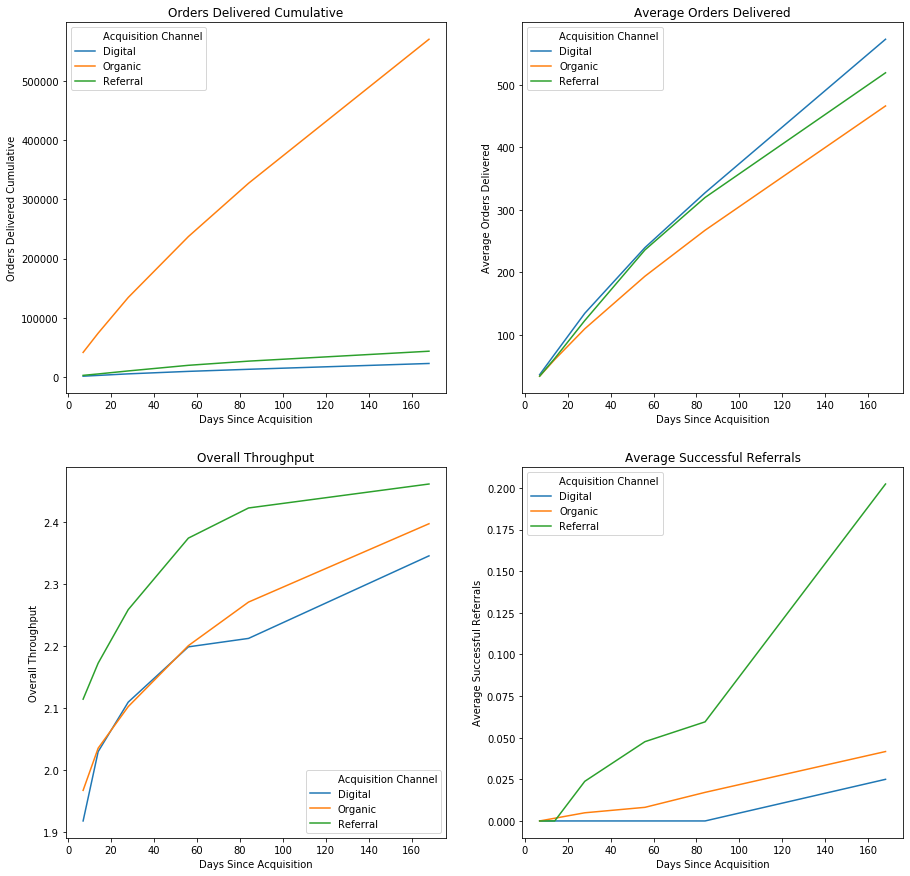

In [15]:
#Roo de Janiero, Bicycles, 3 channels
compare_rider_time_plot(rdj_df,vehicle='Bicycle',acquisition_channels=['Organic','Digital','Referral'])

#The 'ranking' of channels appears unchanged over time.
#The orders delivered and referrals gap grows over time.
# Referral throughput growth is slowing over time. This is not the case for other channels

#Given these graphs should we reconsider setting the comparison point used above? ie: 28 days after acquisition
#Should potentially move to 168 to capture as some metrics diverge quite a lot from the point at 28days

In [21]:
#Check uptick in referrals isn't due to a few riders with a large number of referrals
display(rdj_df.loc[(rdj_df['Days Since Acquisition']==168) & (rdj_df['Acquisition Channel']=='Referral'),:].sort_values('Successful Referrals Cumulative', ascending = False))

#The largest value is 5 which doesn't seem too large.

,Rider_ID,City,Application Date,Application Approved Date,First Work Date,Acquisition Channel,Vehicle,Days Since Acquisition,Hours Worked Cumulative,Orders Delivered Cumulative,Throughput Cumulative,Referrals Cumulative,Successful Referrals Cumulative
16691,92613,Roo de Janeiro,2016-12-30 00:00:00.000000000,2017-01-31 00:00:00.000000000,2017-02-18,Referral,Bicycle,168,155.5,370,2.38,21.0,5.0
15044,98214,Roo de Janeiro,2017-02-18 00:00:00.000000000,2017-02-28 00:00:00.000000000,2017-03-09,Referral,Bicycle,168,646.8,2038,3.15,24.0,3.0
1617,98983,Roo de Janeiro,2017-01-20 00:00:00.000000000,2017-03-05 00:00:00.000000000,2017-03-10,Referral,Bicycle,168,191.7,472,2.46,13.0,2.0
26660,101926,Roo de Janeiro,2017-03-03 00:00:00.000000000,2017-03-21 00:00:00.000000000,2017-03-23,Referral,Bicycle,168,354.4,769,2.17,2.0,2.0
20375,70385,Roo de Janeiro,2016-10-14 00:00:00.000000000,2016-10-29 00:00:00.000000000,2016-10-30,Referral,Bicycle,168,601.3,1398,2.32,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28791,73267,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-10,Referral,Bicycle,168,6.2,16,2.58,NaN,NaN
30218,69500,Roo de Janeiro,2016-10-02 00:00:00.000000000,2016-10-25 00:00:00.000000000,2017-03-05,Referral,Bicycle,168,55.8,146,2.62,NaN,NaN
30266,67940,Roo de Janeiro,2016-10-09 00:00:00.000000000,2016-10-22 00:00:00.000000000,2016-10-22,Referral,Bicycle,168,30.5,55,1.80,NaN,NaN
30324,91755,Roo de Janeiro,2016-12-30 00:00:00.000000000,2017-01-29 00:00:00.000000000,2017-01-30,Referral,Bicycle,168,85.4,194,2.27,NaN,NaN


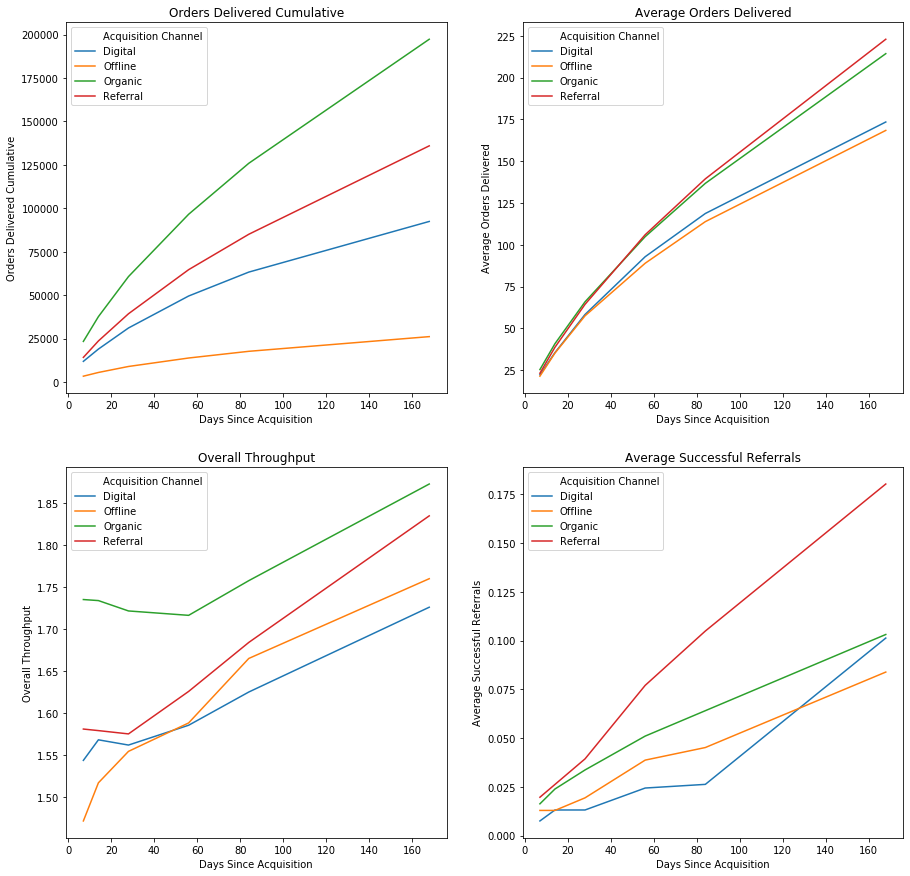

In [16]:
#Roo York, Bicycle, 4 channels
compare_rider_time_plot(ry_df,vehicle='Bicycle',acquisition_channels=['Organic','Digital','Referral','Offline'])

#The ranking of referral applicants doesn't change over time, though other channels appear to move.
#Apart from for average orders delivered, where it overtakes organic. However the difference is small
#Again RGR referrals diverges from the other channels over time
#Throughput for referrals is not dropping here

#'Referrals' colour switches here, green to red. It should be maintained with a colour mapping to avoid confusion, but not implementing here due to time

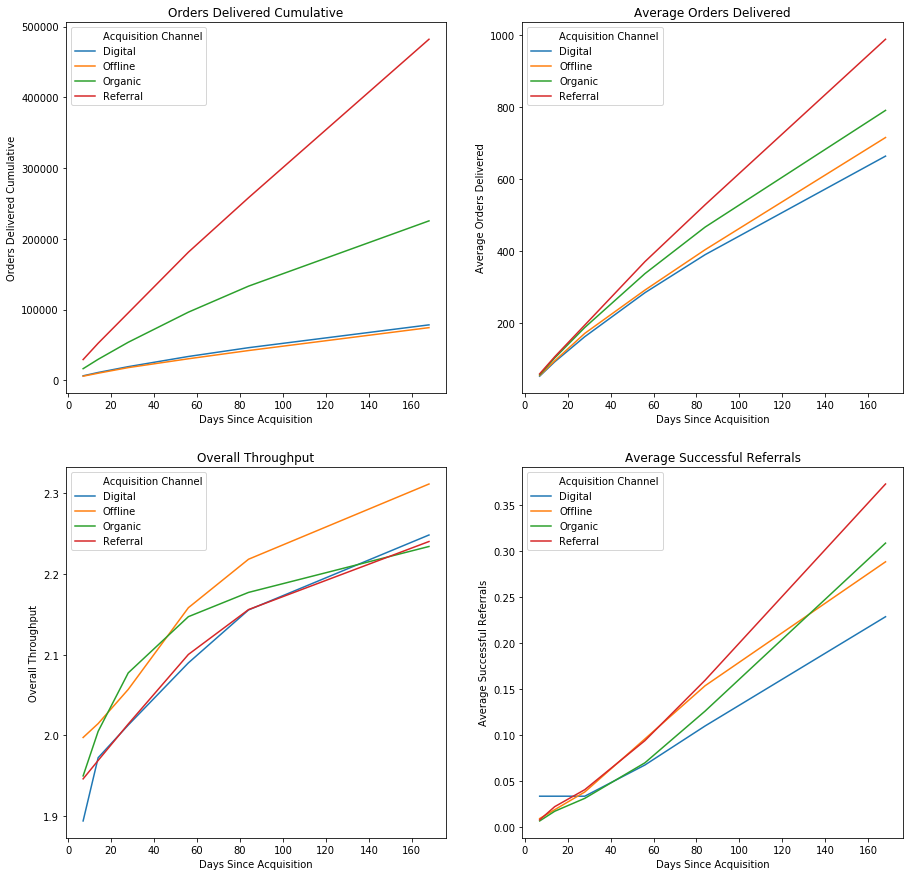

In [17]:
compare_rider_time_plot(ry_df,vehicle='Scooter / Motorcycle',acquisition_channels=['Organic','Digital','Referral','Offline'])

In [19]:
#Repeat of tables but with 168 days of data
print('RDJ - Bicycle')
compare_rider_channel_table(rdj_df, vehicle = 'Bicycle', acquisition_channels=['Organic','Digital','Referral'], days_since_acq=168)
print('Roo York - Bicycle')
compare_rider_channel_table(ry_df, vehicle = 'Bicycle', acquisition_channels=['Organic','Digital','Referral','Offline'], days_since_acq=168)
print('Roo York - Bicycle')
compare_rider_channel_table(ry_df, vehicle = 'Scooter / Motorcycle', acquisition_channels=['Organic','Digital','Referral','Offline'], days_since_acq=168)

RDJ - Bicycle


Acquisition Channel,Riders,Average Orders Delivered,Overall Throughput,Average Successful Referrals
Digital,40,573,2.35,0.03
Organic,1223,466,2.40,0.04
Referral,84,519,2.46,0.20


Roo York - Bicycle


Acquisition Channel,Riders,Average Orders Delivered,Overall Throughput,Average Successful Referrals
Digital,533,173,1.73,0.10
Offline,155,168,1.76,0.08
Organic,921,214,1.87,0.10
Referral,610,223,1.83,0.18


Roo York - Bicycle


Acquisition Channel,Riders,Average Orders Delivered,Overall Throughput,Average Successful Referrals
Digital,118,664,2.25,0.23
Offline,104,715,2.31,0.29
Organic,285,791,2.23,0.31
Referral,488,988,2.24,0.37


#Further steps/thoughts

Why do some of the lines diverge?
    Are the poor performing riders churning or is the cohort as a whole learning?
Why does the growth rate of bicycle referrals in Roo de Janeiro slow down? It is the only one to do so
    Again is this due to churn of better riders or the cohort as a whole performing worse?
Are there are differences between the two different cohorts here? (users joining in the 2 different bumps)
We could look at the success rate of referrals from different channels. Looking to identify channels which have poor/high success rates and attempt to boost/reduce the number of referrals from users acquired from that channel.